# Image Augmentation Experiments

We apply selected transformations described in the [Torchvision Transformers Documentation](https://pytorch.org/vision/stable/transforms.html) to a set of 5 randomly selected images from the RSICD dataset and observe their effects.

The 5 images were manually copied from `gs://clip_rsicd/rsicd_dataset/images_of_RSICD_images_rar/` cloud storage.

This would provide input on what transforms we should add to our pipeline as described in the `Transform` class in the [training script](https://github.com/arampacha/CLIP-rsicd/blob/master/flax_clip_training_wip.py#L208).

Note that we focus only on the Random transforms since we want to do inline image augmentation. The transform pipeline will need to have transforms that are mandatory such as `ToTensor` or mandated by the application such as `Normalize` or `ConvertImageDType`, as well as nice to have for data quality such as `CenterCrop`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision

from PIL import Image
from torchvision import transforms, utils

%matplotlib inline

In [2]:
DATA_DIR = "../data"

In [3]:
image_fns = os.listdir(DATA_DIR)
image_fns

['airport_54.jpg',
 'mediumresidential_88.jpg',
 'meadow_90.jpg',
 'river_8.jpg',
 'resort_73.jpg']

## Provided Image Format

The `run_clip_flax.py` training script is given images as `list<list<list<int>>>` of shape `(224, 224, 3)` in the `preprocessing_function` function. So we want to simulate the same kind of data structure.

Our augmentation pipeline expects the input to be in PIL format, so we will convert it to PIL format at the beginning of the pipeline and set it back to a numpy array at the end.

In [4]:
img_np = plt.imread(os.path.join(DATA_DIR, "airport_54.jpg"))
img_ls = img_np.tolist()
print("list format:", len(img_ls), len(img_ls[0]), len(img_ls[0][0]))
img_np2 = np.array(img_ls)
print("np.array format:", img_np2.shape, type(img_np2), img_np2.dtype)

list format: 224 224 3
np.array format: (224, 224, 3) <class 'numpy.ndarray'> int64


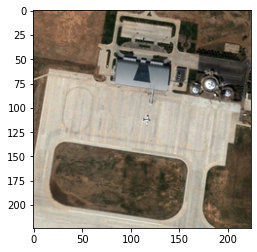

In [5]:
img_pil = Image.fromarray(img_np2.astype(np.uint8))
plt.imshow(img_pil)

## Original Images

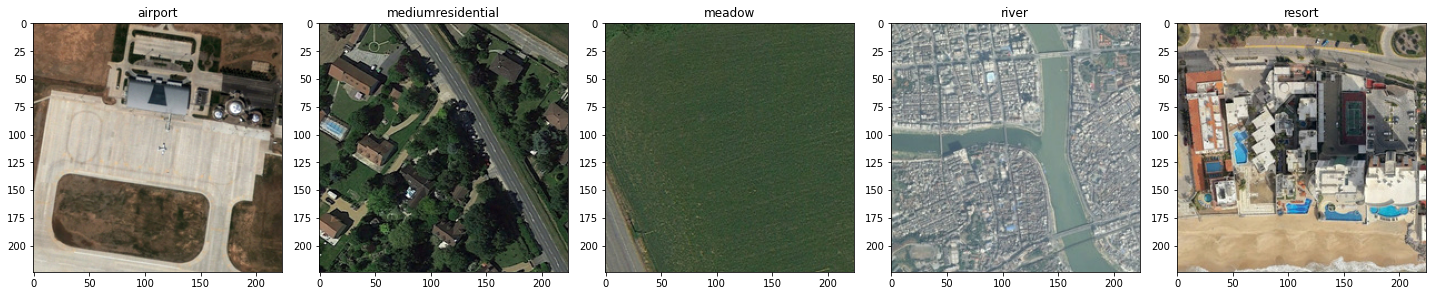

In [6]:
def named_image_list(image_filenames):
    named_images = []
    for filename in image_filenames:
        image_np = plt.imread(os.path.join(DATA_DIR, filename))
        title = filename.split("_")[0]
        named_images.append((title, image_np))
    return named_images


def display_images(named_images):
    plt.figure(figsize=(20, 10))
    for i, (fn, image) in enumerate(named_images):
        plt.subplot(1, len(named_images), i+1)
        title = fn.split("_")[0]
        plt.imshow(image)
        plt.title(title)
    plt.tight_layout()
    plt.show()


def transform_image(image_np, transform):
    return transform(image_np)


to_pil_image = transforms.Compose([
    transforms.ToPILImage()
])    
transformed_images = [(title, transform_image(image, to_pil_image)) 
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## RandomCrop

Random Crops should include 80% of the original (so we don't lose too much information).

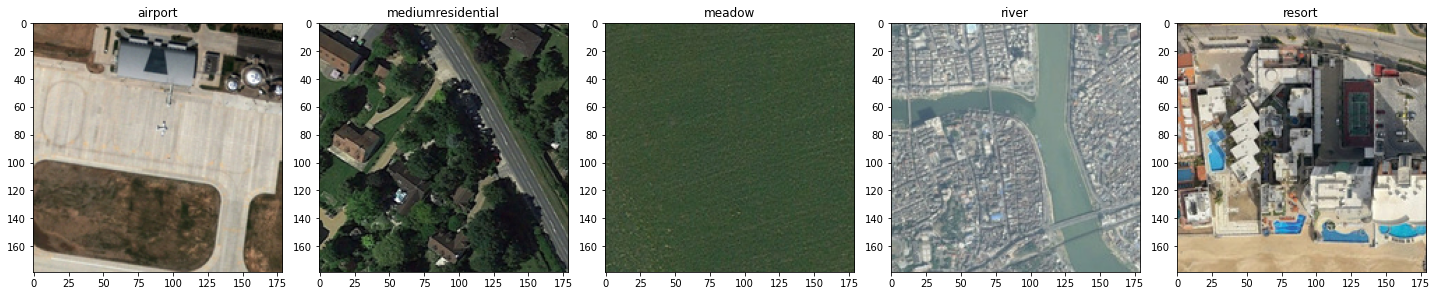

In [7]:
size = int(224 * 0.8)
random_crop = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size)
])

transformed_images = [(title, transform_image(image, random_crop))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## ColorJitter

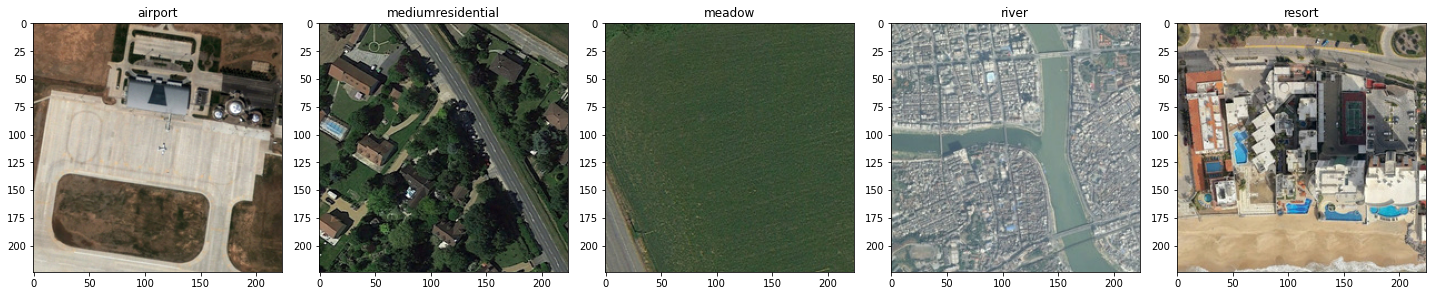

In [8]:
color_jitter = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter()
])

transformed_images = [(title, transform_image(image, color_jitter))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## RandomHorizontalFlip

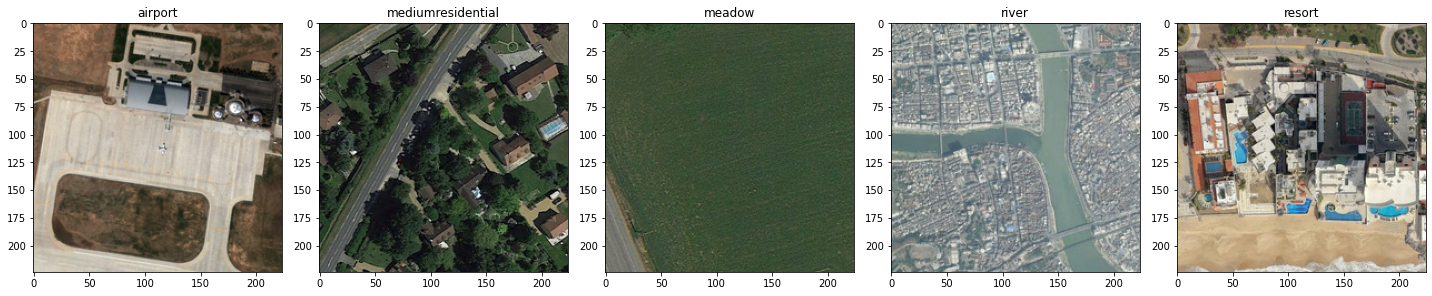

In [9]:
random_hflip = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip()
])

transformed_images = [(title, transform_image(image, random_hflip))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## RandomVerticalFlip

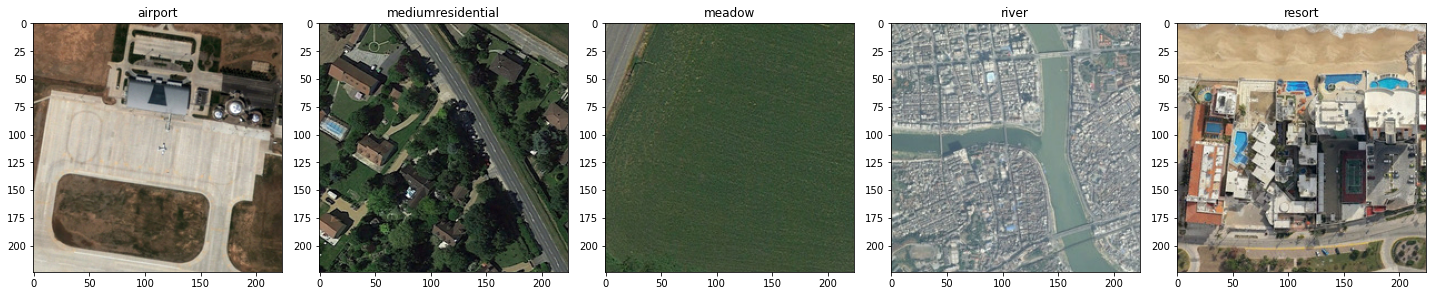

In [10]:
random_vflip = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip()
])
transformed_images = [(title, transform_image(image, random_vflip))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## RandomResizedCrop

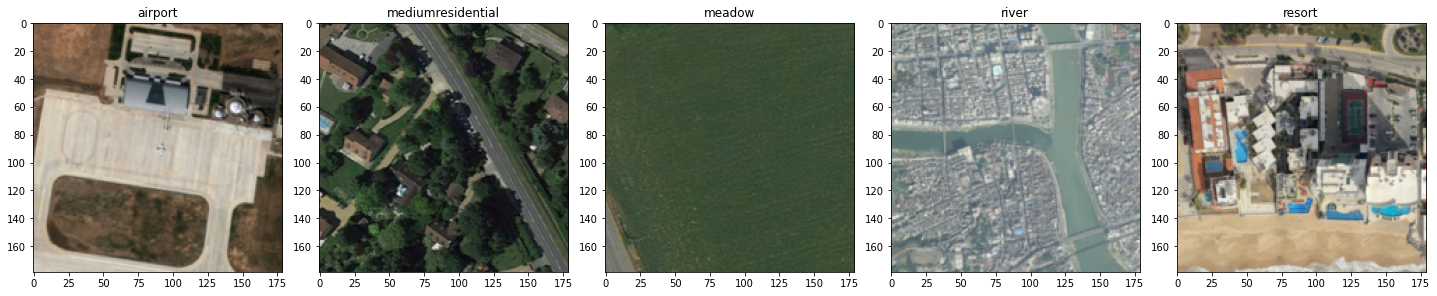

In [11]:
random_resize_crop = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(size, scale=(0.8, 1.2), ratio=(1.0, 1.0))
])

transformed_images = [(title, transform_image(image, random_resize_crop))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)

## All Together

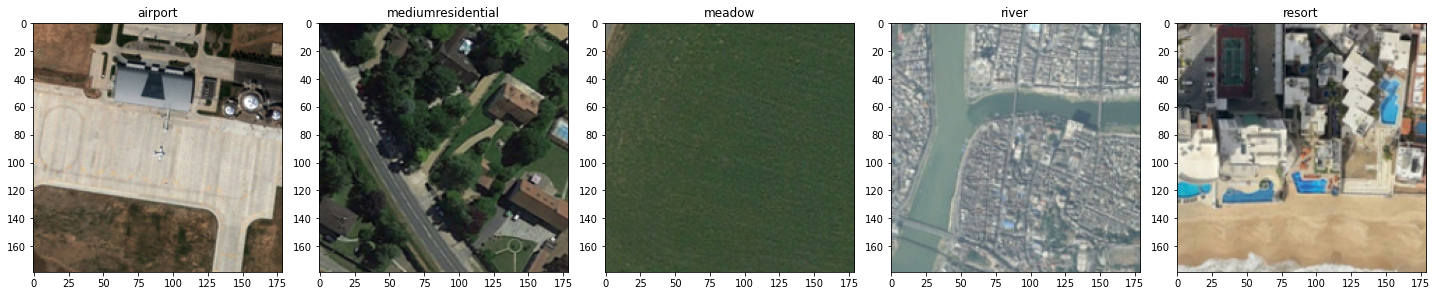

In [13]:
composed = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size, scale=(0.8, 1.2), ratio=(1.0, 1.0)),
])

transformed_images = [(title, transform_image(image, composed))
                      for title, image in named_image_list(image_fns)]
display_images(transformed_images)